## **Text Mining Classification Cyberbulling Tweets**

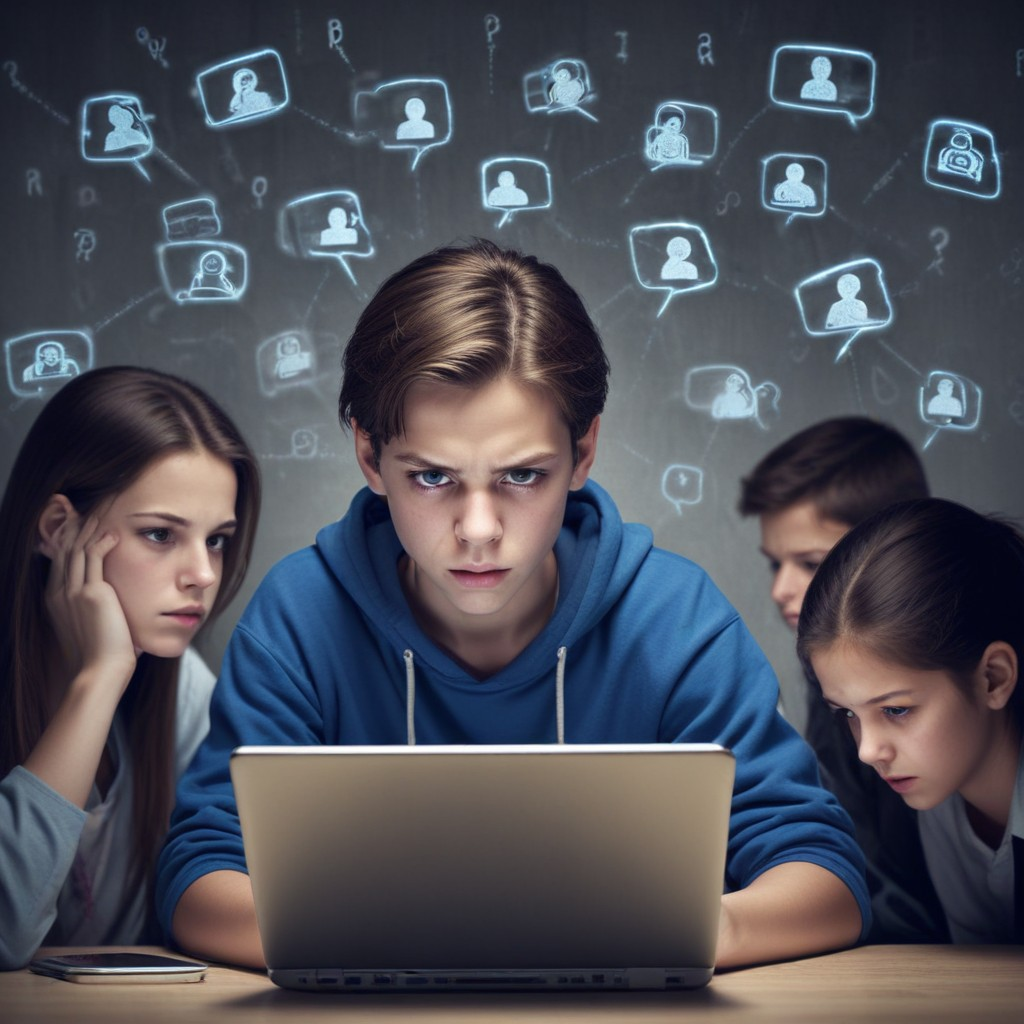

In [1]:
!wget "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv "
import sys
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!pip install emoji_extractor
from emoji_extractor.extract import Extractor
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
# Instalar la fuente Noto Color Emoji
!apt-get install -y fonts-noto-color-emoji
!Pip install textblob

--2024-10-23 16:52:40--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv%20
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-23 16:52:40 ERROR 404: Not Found.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 22.5 MB/s eta

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


--2024-10-23 16:53:44--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   265KB/s    in 0.4s    

2024-10-23 16:53:45 (265 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,944 kB of archives.
After this operation, 11.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/mai

In [2]:
!pip install contractions

In [3]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# **Proyecto**


En este proyecto, vamos a trabajar con un conjunto de datos de tweets etiquetados como que contienen discurso de odio o no. La función load_prepare_data() se utiliza para cargar y preparar los datos para el análisis y el modelado


Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

## Objetivo:

El objetivo principal de este estudio es desarrollar y entrenar modelos de clasificación capaces de categorizar con precisión los tuits como que contienen discurso de odio o no.
Para lograrlo, se aplicarán varias etapas de exploración de datos, preprocesamiento y vectorización de texto. El estudio también implicará el entrenamiento y la evaluación de múltiples modelos de aprendizaje automático.

**Enfoque**

**1.	Obtención del Corpus.**

**2.	Análisis exploratorio de datos (EDA)**
La fase inicial implica un análisis exploratorio del conjunto de datos.
Esto incluye:
•	Evaluar la cantidad de documentos (tweets),
•	Visualizar la distribución de la longitud de los tweets,
•	Generar nubes de palabras y
•	Realizar análisis exploratorios adicionales para obtener información sobre los datos.
Este paso es crucial para comprender la estructura y el contenido de los datos.

**3.	Preprocesamiento**
También incluiremos técnicas de normalización de texto para limpiar y preprocesar los datos. Estas técnicas incluyen:
Eliminar palabras vacías,
Eliminar la puntuación y
Lematización o derivación para reducir las palabras a su forma básica.

**4.	Vectorización de texto**
Para convertir los tuits a un formato legible por máquina, se aplicarán varias estrategias de vectorización de texto.
Estos incluyen:
TF-IDF (frecuencia de término-frecuencia de documento inversa) para capturar la importancia de las palabras en relación con todo el corpus,incrustaciones de palabras para capturar relaciones semánticas entre palabras.
Se pueden incorporar características adicionales, como análisis de sentimientos o características léxicas, para mejorar la capacidad del modelo para detectar el discurso de odio.

**5.	Entrenamiento y validación del modelo**
La fase final implica el entrenamiento y la evaluación de múltiples modelos de clasificación para identificar el algoritmo de mejor rendimiento.
Se probarán al menos tres clasificadores de aprendizaje automático diferentes. Después de evaluar su rendimiento general, se realizará un ajuste de hiperparámetros para optimizar el mejor modelo. Se utilizarán las siguientes métricas para la evaluación:
•	Exactitud
•	Precisión
•	Recordatorio
•	Puntuación F1
•	Support
El objetivo es seleccionar el modelo más adecuado que pueda detectar con precisión el discurso de odio en los tweets, lo que proporciona información valiosa sobre la naturaleza del acoso cibernético en las plataformas de redes sociales.


## 0. Imports


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import contractions
import gc
import wordcloud as wc
import plotly.express as px

from tqdm.autonotebook import tqdm
tqdm.pandas()
from emoji_extractor.extract import Extractor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

<ipython-input-4-26d07012f87f>:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [5]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

In [6]:
def visualizar_k_rows_df(df, numero_filas, cmap):
  return df.head(numero_filas).style.background_gradient(cmap = cmap)

In [7]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
#path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
data = load_prepare_data(path_data)

In [8]:
visualizar_k_rows_df(data.sample(50),4,'Blues')

,tweet_text,cyberbullying
17984,You’re not a Christian if you support radical right wing politicians. There is nothing Christ-like about their actions,1
42084,"@MisticaNiebla @Rayvn_ @WittyDuchess @SandersFirmPC If I was a nigger, I'd still be better than your racist dumb ass. Go fuck a cattle prod.",1
2553,@Pass_The_Mike_ Which is a problem today. You cant say you are a Christian but enjoy what God hates.,0
31046,@Blackamazon i really appreciate the kind words from you. i'm a big admirer of your voice. <3,1


In [9]:
data.head()

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('tweet_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cyberbullying']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cyberbullying'}, axis=1)
              .sort_values('cyberbullying', ascending=True))
  xs = counted['cyberbullying']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('cyberbullying', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cyberbullying')
_ = plt.ylabel('count()')

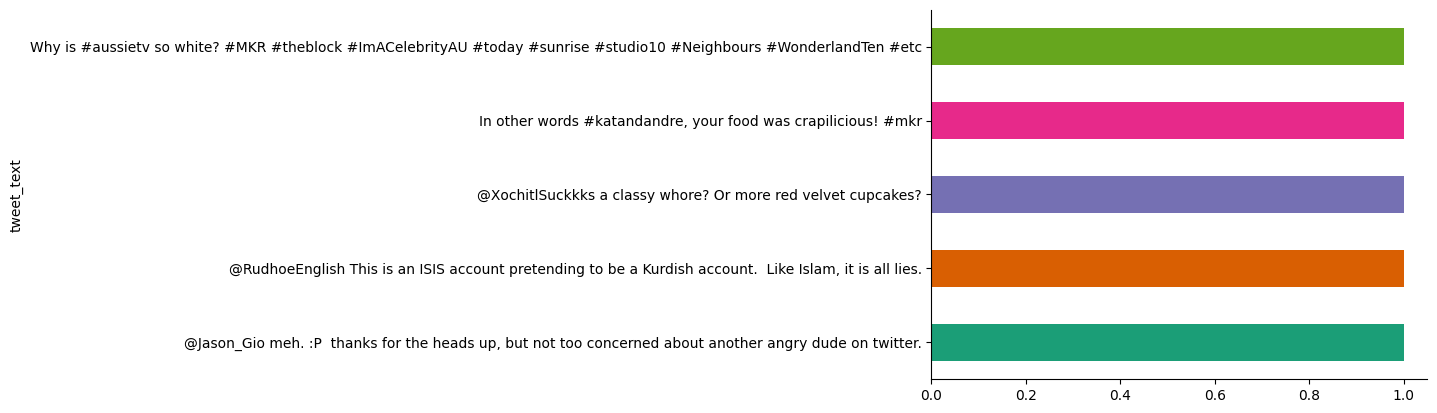

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('tweet_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
np.unique(data['cyberbullying'])

array([0, 1])

Como posteriormente trabajaremos con los emojis, voy a extraer los emoticonos a una columna específica en el dataframe:



In [14]:
data["emojis"] = data["tweet_text"].apply(lambda x: extract_emojis(x))

## *2. Análisis exploratorio de los datos (EDA)*

* **Número de documentos y columnas:**

Comenzamos mostrando el número de documentos, del data frame:

In [15]:
print("Tenemos un conjunto de {} documentos".format(len(data)))
print("El dataframe tiene {} columnas".format(data.shape[1]))

Tenemos un conjunto de 47692 documentos
El dataframe tiene 3 columnas


* **Número de documentos duplicados:**

Despues, comprobamos y eliminamos las filas con algún valor vacío (NA) y quitaremos los duplicados.

In [16]:

cantidad_duplicados = np.sum(data.duplicated(subset=["tweet_text"]))

if cantidad_duplicados > 0:
    print("Existen {} documentos duplicados".format(cantidad_duplicados))
    # Quitaremos esos duplicados
    dataset = data.drop_duplicates(subset=["tweet_text"])
    print("Después de quitar duplicados, tenemos un conjunto de {} documentos".format(dataset.shape[0]))
else:
    print("No hay documentos duplicados en el conjunto de datos.")


Existen 1675 documentos duplicados
Después de quitar duplicados, tenemos un conjunto de 46017 documentos


Comprobaramos que no hayan quedado Nulls en ningunas de las dos columnas del dataset

In [17]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],
                                                                                                        np.sum(dataset.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-17-a8dd3c362a12>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],
<ipython-input-17-a8dd3c362a12>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

* **Número de documentos por cada clase:**

Contamos el número de elementos de cada clase,  con un `groupby()` sobre la columna 'cyberbullying' y un conteo de elementos posteriormente.

En este caso nos encontramos dos categorías para los documentos (tweet_text):

- "cyberbullying = 1": Tweets con contenido negativo.
- "cyberbullying = 0": Tweets con contenido positivo.

In [19]:
print(data["cyberbullying"].value_counts())

# Número de elementos de cada clase:
data.groupby(['cyberbullying']).count()


cyberbullying
1    39747
0     7945
Name: count, dtype: int64


,tweet_text,emojis
cyberbullying,,
0,7945,7945
1,39747,39747


Viendo los resultados las categorías en el conjunto de datos no están balanceadas. Tenemos 39747 instancias etiquetadas como 1 (cyberbullying) y solo 7945 instancias etiquetadas como 0 (sin cyberbullying). Para lograr un mejor equilibrio,se podrían considerarse técnicas como SMOTE, oversampling o undersampling para igualar la cantidad de muestras en ambas categorías.

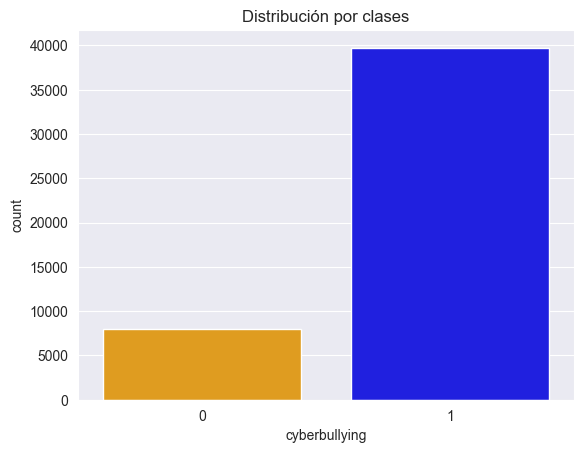

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos y calcular el conteo
data_grouped = data.groupby('cyberbullying').size().reset_index(name='count')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
sns.barplot(x='cyberbullying', y='count', data=data_grouped, palette=['orange', 'blue'], ax=ax)

# Configurar el título y mostrar el gráfico
ax.set_title('Distribución por clases')
plt.show()


*   **Contenido de los tweets**

 Antes de empezar a procesar, vamos a revisar algunos tweets de cada una de las dos clases.

Tweets positivos:

In [20]:
data[data.cyberbullying==0].sample(3).tweet_text.to_list()

['@d_bully personally i blame Arsene. must all be gooners. Signing chamberlain instead of a centre back must have pushed them over the edge',
 'Running a @QuickPull on my BlackBerry. Brb!',
 'If you tell me to get one of those weird hexa things i will never talk to you again.']

Tweets negativos:

In [21]:
data[data.cyberbullying==1].sample(3).tweet_text.to_list()

['I was just subjected to a group text of girls on my high school softball team who bullied me RELENTLESSLY when I was going through a really rough time in my life',
 '@asem_1994 And I know that Umar imposed the code of Umar, making Jews and Christians third class citizens for centuries.',
 'Gotta love a good gay rape joke less thN a minute in #GameOfThrones #ThronesYall']


Como podemos observar, en los tweets con contenido negativo, correspondientes a la categotía 1, hacen mención a  'chistes' sobre violaciones, los 'chistes' gays y los 'chistes' sobre negros, etc., además de palabra peyorativas como odio, imbécil,NEGROS TONTOS.

Además observamos también,signos de puntuación, palabras en minúscula y mayúscula, asunto que trataremos más adelante para reducir la dimensionalidad de los tweets.

* **Distribución de la longitud de los tweets en palabras:**

Para seguir con el análisis exploratorio, vamos a hacer un cálculo la longitud de cada uno de los textos de los documentos para posteriormente dibujar su histograma y ver diferencias entre las categorías del dataset:

El código que proporcionaste realiza las siguientes acciones:

Definición de la función average_word_length:
La función average_word_length toma un argumento text, que se supone es una cadena de texto (por ejemplo, un tweet).
Divide el texto en palabras utilizando el espacio como separador.
Calcula la longitud total de todas las palabras en el texto.
Redondea el resultado a dos decimales.
Creación de nuevas columnas en el DataFrame data:
data['tweet_length']: Calcula la longitud de cada tweet en palabras y almacena los resultados en esta columna.

En resumen, este código procesa los tweets en tu conjunto de datos, calcula la longitud de los tweets en palabras  y agrega esta información como nueva columnas en el DataFrame data. Esto puede ser útil para analizar la estructura y contenido de los tweets.


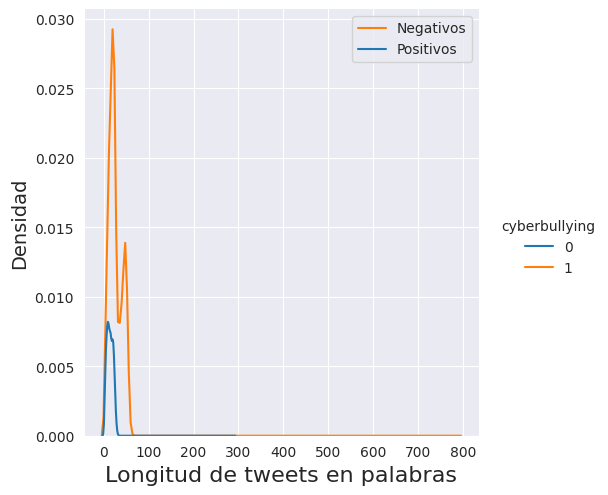

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo del gráfico
sns.set_style("darkgrid")

# Creamos el gráfico de densidad
sns.displot(data=data, x=data['tweet_text'].str.split().str.len(), hue="cyberbullying", kind="kde", legend=True)

# Definimos el título de los ejes
plt.xlabel('Longitud de tweets en palabras', fontsize=16)
plt.ylabel('Densidad', fontsize=14)

# Añadimos leyendas
plt.legend(["Negativos", "Positivos"])

# Finalmente mostramos el gráfico
plt.show()


In [23]:
import plotly.express as px

# Definimos la secuencia de colores
color_discrete_sequence = ['orange', 'blue']

# Calculamos la longitud de los tweets directamente en la función de trazado
data['tweet_length'] = data['tweet_text'].apply(lambda x: len(x.split()))

# Creamos el boxplot
fig = px.box(data,
             x='cyberbullying',
             y='tweet_length',
             color='cyberbullying',
             color_discrete_sequence=color_discrete_sequence,
             template='plotly',
             title='Boxplot de Longitudes de Tweets por clase')

# Ajustamos el rango del eje y
fig.update_yaxes(range=[0, 100])

# Mostramos el gráfico
fig.show()


En el gráfico de cajas anterior, comparamos la longitud de los tweets en dos categoría diferentes, donde se representa la ausencia o precesencia de ciberacoso, los tweets sin ciberacoso tienden a ser más cortos en longitud y los tweests con ciberacoso son generalmente más largos y tienen un rango más amplio de longitudes.

El gráfico también muestra un outlier cerca del valor 70 en el eje Y para la categoría “1”, lo que indica que hay tweets significativamente más largos en esta categoría. Las cajas muestran la mediana, los cuartiles y los valores atípicos, lo que proporciona una visión clara de la distribución de la longitud de los tweets en relación con el ciberacoso.

.

<ipython-input-24-77abb5fe13b3>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




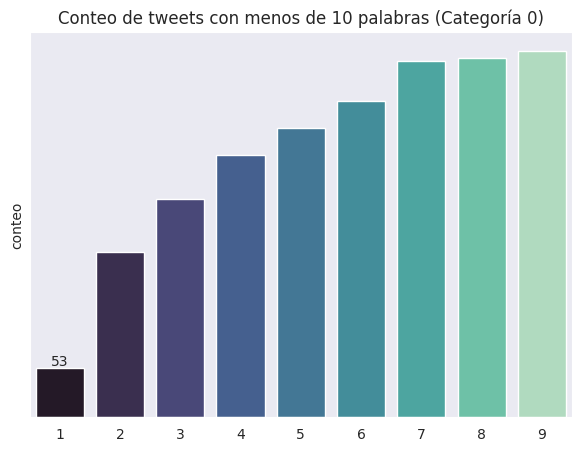

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los tweets con menos de 10 palabras para cada categoría
filtered_data_0 = data[(data['tweet_length'] < 10) & (data['cyberbullying'] == 0)]
filtered_data_1 = data[(data['tweet_length'] < 10) & (data['cyberbullying'] == 1)]

# Creamos la figura para la categoría 0
plt.figure(figsize=(7,5))
ax = sns.countplot(x='tweet_length', data=filtered_data_0, palette='mako')
plt.title('Conteo de tweets con menos de 10 palabras (Categoría 0)', fontsize=12)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('conteo')
plt.xlabel('')
plt.show()


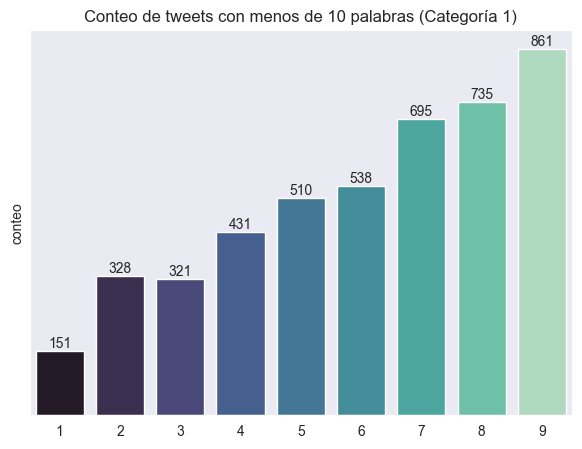

In [ ]:
# Creamos la figura para la categoría 1
plt.figure(figsize=(7,5))
ax = sns.countplot(x='tweet_length', data=filtered_data_1, palette='mako')
plt.title('Conteo de tweets con menos de 10 palabras (Categoría 1)', fontsize=12)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('conteo')
plt.xlabel('')
plt.show()

Observamos que en la categoría "0" positivos, existen 53 tweets con menos de 10 palabras, mientras que en la categoría "1" negativos, existen 151 tweets con menos de 10 palabras.



## **Visualización del contenido de los tweets con Wordcloud:**

Se va a usar de la visualización mediante wordcloud para enfatizar los términos más frecuentes dentro de los tweets, con wordcloud se da mayor tamaño o menos en funcion de la concurrencia de cada término. Esto es interesante pero tendremos que volverlo a ver puesto que los stopwords, menciones numeros van a distorsionar la composición de esta composición. Nos interesa ver la frecuencia de términos cuando hayamos normalizado el texto, eliminado términos no relevantes.

Como paso previo, hay que generar una variable tipo string con todos los textos concatenados por cada una de las categorías de cyberbulling:

In [39]:
txt_cyberbullying_0 = ",".join(dataset[dataset.cyberbullying==0].tweet_text.to_list()) # Nos quedamos con dataset.cyberbullying==0
txt_cyberbullying_1 = ",".join(dataset[dataset.cyberbullying==1].tweet_text.to_list()) # Nos quedamos con dataset.cyberbullying==0


Generamos objeto WordCloud con los parametros elegidos

In [46]:
#Defino los stopwords en ingles
!pip install wordcloud
from wordcloud import WordCloud

#Defino los stopwords en ingles
en_stopwords = stopwords.words("english") # 'english'

#Creo un objeto WordCloud con los parámetros.

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)


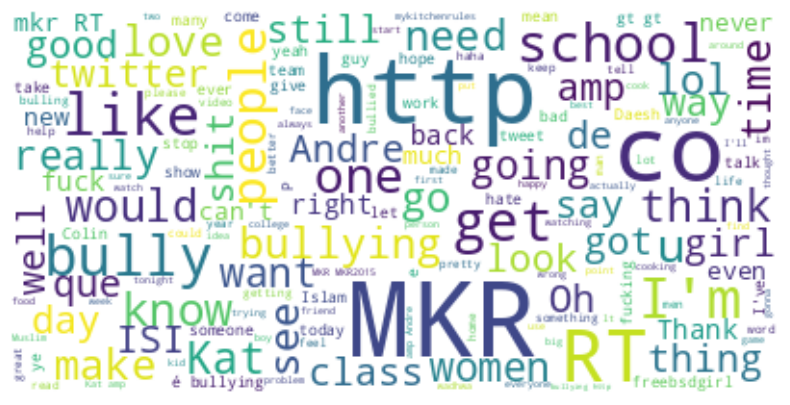

In [47]:
# Genera el wordcloud para cyberbullying = 0
wordcloud.generate(txt_cyberbullying_0)
# Visualizalo en una imagen
wordcloud.to_image()
# Visualizar la imagen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

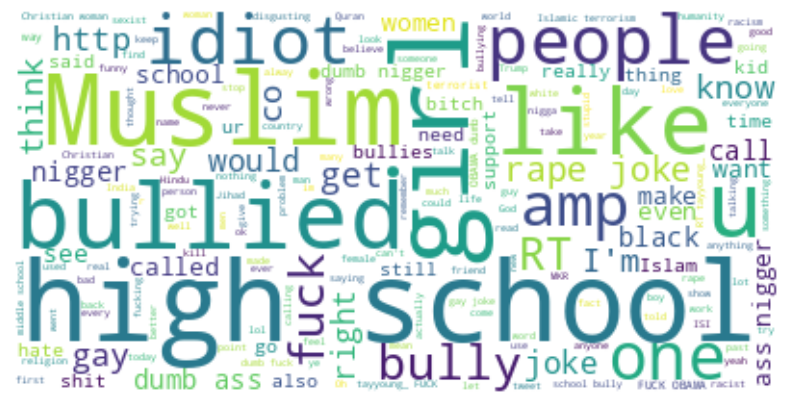

In [48]:
# Genera el wordcloud para cyberbullying = 1
wordcloud.generate(txt_cyberbullying_1)
# Visualizalo en una imagen
wordcloud.to_image()
# Visualizar la imagen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se pueden obtener las siguientes conclusiones del wordCloud: Para los casos de No Cyberbullying, aparecen enlaces de páginas web (http y co), etiquetas de Tweeter como RT o MKR ( Que en un principio no está muy claro que es), y términos como school o incluso love.

Para los casos de cyberbullying, palabras como high school, muslim, bullied girl o algunos insultos, son las más predominantes, ademas de que a diferencia de los casos de no cyberbulling, no es mayoritario la aparicion de enlaces webs (http o co).

* **Análisis de Emojis**
Vamos a hacer un pequeño análisis sobre los emojis en el conjunto de datos de trabajo. En primer lugar vamos a ver el número de documentos que tienen emojis:

In [50]:

filas_con_icono = data[data['emojis'].apply(lambda x: len(x) >= 1)]
filas_sin_icono = data[data['emojis'].apply(lambda x: len(x) ==0)]
# Imprimir el resultado
print("Número de filas con al menos un icono:", len(filas_con_icono))
print("Número de filas sin iconos:", len(filas_sin_icono))

Número de filas con al menos un icono: 440
Número de filas sin iconos: 47252


In [51]:
# Calcula el número total de filas
total_filas = len(data)

# Calcula el número de filas con y sin iconos
filas_con_icono = len(data[data['emojis'].apply(lambda x: len(x) >= 1)])
filas_sin_icono = len(data[data['emojis'].apply(lambda x: len(x) == 0)])

# Calcula los porcentajes
porcentaje_con_icono = (filas_con_icono / total_filas) * 100
porcentaje_sin_icono = (filas_sin_icono / total_filas) * 100

# Imprime los resultados
print("Porcentaje de filas con al menos un icono: %.2f%%" % porcentaje_con_icono)
print("Porcentaje de filas sin iconos: %.2f%%" % porcentaje_sin_icono)


Porcentaje de filas con al menos un icono: 0.92%
Porcentaje de filas sin iconos: 99.08%


Se observa que en torno el 1% de documentos tiene emojis.Por no considerarlo un dato relevante, vamos a prescindir  del uso de emojis en las categorías del dataset.

## *3. Procesamiento y Transformación*

* En primer lugar vamos a redefinir nuestros datos, ya que tras el análisis exploratorio, hemos considerado eliminar los outliaers y precindir de los tweetss, con menos de 10 palabras por considerar que no tienen un peso significativo en nuestro estudio.

In [52]:
# Número de tweets en cada categoría con menos de diez palabras
tweets_c0 = 53
tweets_c1 = 151

# Número total de tweets
total_tweets = 47692

# Calcula los porcentajes
porcentaje_cat0 = (tweets_c0 / total_tweets) * 100
porcentaje_cat1 = (tweets_c1 / total_tweets) * 100

# Imprime los resultados
# Imprime los resultados con el símbolo %
print("Porcentaje de tweets con menos de 10 palabras en la categoría 0: %.2f%%" % porcentaje_cat0)
print("Porcentaje de tweets con menos de 10 palabras en la categoría 1: %.2f%%" % porcentaje_cat1)


Porcentaje de tweets con menos de 10 palabras en la categoría 0: 0.11%
Porcentaje de tweets con menos de 10 palabras en la categoría 1: 0.32%


In [53]:
datos = data[data['tweet_length'] > 10]
datos = data[data['tweet_length'] < 70]

In [54]:
datos

,tweet_text,cyberbullying,emojis,tweet_length
0,"In other words #katandandre, your food was cra...",0,[],9
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,[],14
2,@XochitlSuckkks a classy whore? Or more red ve...,0,[],9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,[],18
4,@RudhoeEnglish This is an ISIS account pretend...,0,[],18
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1,[],42
47688,Turner did not withhold his disappointment. Tu...,1,[],45
47689,I swear to God. This dumb nigger bitch. I have...,1,[],20
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,[],15


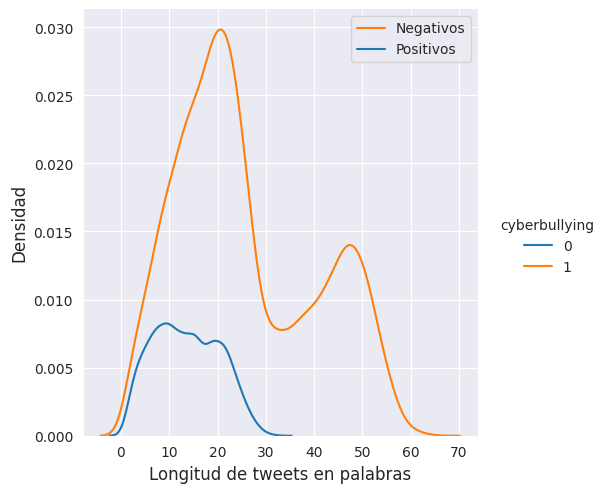

In [55]:
# Configuramos el estilo del gráfico
sns.set_style("darkgrid")

# Creamos el gráfico de densidad
sns.displot(data=datos, x="tweet_length", hue="cyberbullying", kind="kde", legend=True)

# Definimos el título de los ejes
plt.xlabel('Longitud de tweets en palabras', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Añadimos leyendas
plt.legend(["Negativos", "Positivos"])

# Finalmente mostramos el gráfico
plt.show()

In [60]:
color_discrete_sequence = ['orange', 'blue']

# Crea el boxplot
fig = px.box(datos,
             x='cyberbullying',
             y='tweet_length',
             color='cyberbullying',
             color_discrete_sequence=color_discrete_sequence,
             template='plotly',
             title='Boxplot de Longitudes de Tweets por clase')

# Ajusta el rango del eje y
fig.update_yaxes(range=[0, 150])

# Muestra el gráfico
fig.show()


Hemos eliminado los tweetss con menos de 10 palabras y más de 70, ya que podían
 ser valores atípicos.



Ahora vamos a definir una función que cuenta el número de hashtags, menciones y URLs en un texto de tweet, y luego la aplica a cada fila de la columna 'tweet_text' de nuestra base de datos.

In [ ]:
def count_symbols(tweet_text):
    hashtag_count = len(re.findall(r'#', tweet_text))
    mention_count = len(re.findall(r'@', tweet_text))
    url_count =len(re.findall("http://", tweet_text))
    return hashtag_count, mention_count, url_count

# Apply the function to each row in the 'text' column
data[['num_hashtags', 'num_mentions','num_URL']] = data['tweet_text'].apply(lambda x: pd.Series(count_symbols(x)))

print('\nDataset shape: ', data.shape)
data.head()


Dataset shape:  (47692, 6)


,tweet_text,cyberbullying,tweet_length,num_hashtags,num_mentions,num_URL
0,"In other words #katandandre, your food was cra...",0,9,2,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,14,10,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,9,0,1,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,18,0,1,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,18,0,1,0


Vamos a proceder a normalizar los datos. Para ello vamos a utilizar las funciones anteriormente definidas:

- Preprocesar los textos:
    - Primero expanderemos las contracciones de los tweets
    - En esta ocasión no extraeremos los emojis.
    - Tokenizaremos
    - Quitaremos stop words
    - Quitaremos puntuación
    - Lematizaremos

In [ ]:
# Cambiamos el nombre de las categorías
datos= data.rename(columns={'tweet_text': 'text'})

#### Expandir contracciones.
Este paso sólo se hace con contenido en inglés!!

In [ ]:
import re, string
import emoji
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Inicializa el tokenizador de tweets
tweet_tokenizer = TweetTokenizer()

# Función para eliminar emojis
def remove_emojis(text):
    return emoji.get_emoji_regexp().sub(u'', text)

# Función para eliminar etiquetas HTML
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Normalización
def normalize(text):
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = remove_emojis(text)
    text = remove_html_tags(text)
    return text

# Tokenización
def tokenize(text):
    text = [word for word in tweet_tokenizer.tokenize(text) if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

# Lematización
def lemmatize(text):
    tokenized = tweet_tokenizer.tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

# Aplicamos todas las funciones en el orden correcto
def preprocess(text):
    text = normalize(text)
    text = tokenize(text)
    text = lemmatize(text)
    return text


In [ ]:
tweet_text_processed = []
for t in datos.text:
    tweet_text_processed.append(preprocess(t))

#### Extraemos sentimiento de los tweets
De nuevo, DEPENDIENTE del idioma. Utilizaremos [textblob](https://textblob.readthedocs.io/en/dev/quickstart.html?highlight=polarity#sentiment-analysis). Para español hay que buscar alternativas.

In [ ]:
datos['tweet_text_processed'] = tweet_text_processed

In [ ]:
datos.head(5)

,text,cyberbullying,tweet_length,num_hashtags,num_mentions,num_URL,tweet_text_processed
0,"In other words #katandandre, your food was cra...",0,9,2,0,0,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,14,10,0,0,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,9,0,1,0,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,18,0,1,0,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,0,18,0,1,0,isi account pretend kurdish account like islam...


Una vez hemos limpiado los textos de los tweets, vamos a analizar el sentimiento de los tweets, a través de TexBlob.
Que calcula:
-La subjetividad de un texto, donde el valor 0 indica que el texto es completamente objetivo, y el valor 1 indica que el texto es completamente subjetivo.

-La polaridad que es una medidad de positividad o negatividad de  un texto, Un valor de -1 significa que el texto es completamente negativo, un valor de 1 significa que el texto es completamente positivo, y un valor de 0 significa que el texto es neutral.


In [ ]:
from textblob import TextBlob
datos["sent_subjectivity_str"] = datos["tweet_text_processed"].progress_apply(lambda x: TextBlob(x).sentiment.subjectivity)
datos["sent_polarity_str"] = datos["tweet_text_processed"].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

100%|██████████| 47692/47692 [00:09<00:00, 4963.37it/s]


Hemos añadido dos nuevas columnas al dataframe, con datos que contienen la subjetividad y la polaridad de cada tweet. Esto podría ser útil para entender cómo los sentimientos expresados en los tweets varían.

In [ ]:
datos.head(3)


NameError: name 'datos' is not defined

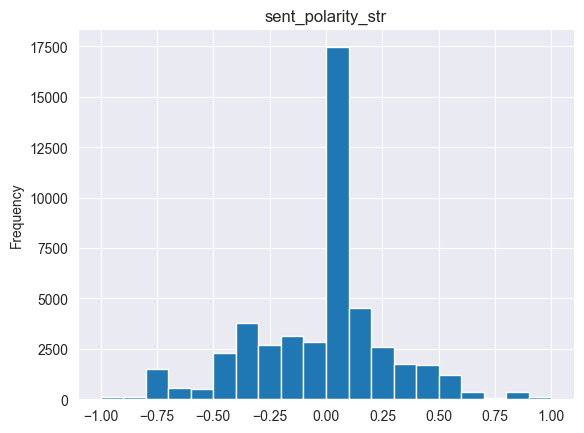

In [ ]:
# @title sent_polarity_str

from matplotlib import pyplot as plt
datos['sent_polarity_str'].plot(kind='hist', bins=20, title='sent_polarity_str')
plt.gca().spines[['top', 'right',]].set_visible(False)

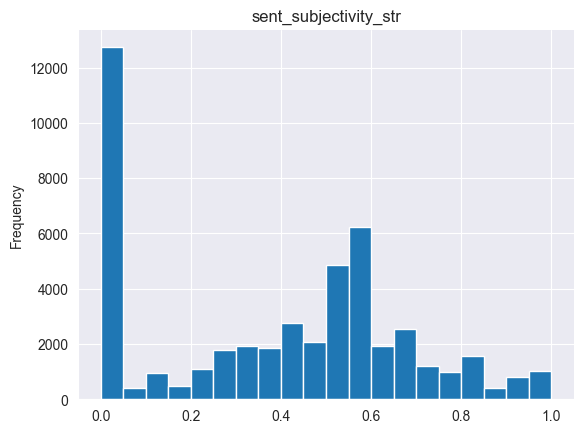

In [ ]:
# @title sent_subjectivity_str

from matplotlib import pyplot as plt
datos['sent_subjectivity_str'].plot(kind='hist', bins=20, title='sent_subjectivity_str')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 4. Vectorización
#### Vectorizacion tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data= vectorizador.fit_transform(datos["tweet_text_processed"])

In [ ]:
vector_data

<47692x424 sparse matrix of type '<class 'numpy.float64'>'
	with 354101 stored elements in Compressed Sparse Row format>

Vectorizacion embeddings

In [ ]:
import gensim.downloader as api
glove_emb = api.load('glove-twitter-25') # Descargamos y cargamosel embedding de "glove-twitter-25"

Ahora convertirmos las oraciones en vectores para que puedan ser utilizados como entrada para modelos de ML,Al tomar la media de los vectores de las palabras en una oración, se obtiene un único vector que captura algo de la información semántica de la oración.

In [ ]:
def get_average_vector(sentence):
  #retokenizamos con nuestra función
  tokens = tokenize(sentence)
  lista = list()
  for i in tokens:
    try:
      lista.append(glove_emb.get_vector(i) )
    except:
      continue

  try:
    resultado = np.mean(lista, axis=0)
  except:
    resultado = np.zeros(25)
  return resultado

In [ ]:
datos["embeddings"] = datos["tweet_text_processed"].progress_apply(lambda x: get_average_vector(x))

  0%|          | 0/47692 [00:00<?, ?it/s]

Concatenamos embeddings, y características extras:

In [ ]:
vector_data_embeddings_feats = pd.concat([datos.embeddings.apply(pd.Series),
                datos[["sent_subjectivity_str","sent_polarity_str","num_hashtags","num_mentions","num_URL"]]], axis=1)

In [ ]:
vector_data_embeddings_feats.shape

(47692, 30)

In [ ]:
vector_data_embeddings_feats = vector_data_embeddings_feats.fillna(0)

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

## 5. Entrenamiento y evaluación de modelos


In [ ]:
target_names = ['no_cyberbullying', 'cyberbullying']
target=datos["cyberbullying"]

In [ ]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = target
X = sp.sparse.hstack((vector_data,vector_data_embeddings_feats.values),format='csr')

In [ ]:
X

<47692x454 sparse matrix of type '<class 'numpy.float64'>'
	with 1630022 stored elements in Compressed Sparse Row format>

División train/text

In [ ]:
from sklearn.model_selection import train_test_split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(38153, 454)
(9539, 454)


Rebalanceo de clases:

In [ ]:
# Cargamos
#from imblearn.over_sampling import SMOTE
# Creamos objetos
#sm = SMOTE(random_state=42)
# Retransformamos
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[0] != vc[1]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

cyberbullying
1    31797
0    31797
Name: count, dtype: int64

In [ ]:
#np.array(np.unique(y_res, return_counts=True)).T

array([[    0, 31797],
       [    1, 31797]], dtype=int64)

Ahora el conjunto de entrenamiento está equilibrado y listo para introducirse en el modelo ML

## Modelos  sin balancear las clases

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings


def model_evaluation(models, score, X, y):
    results = []
    names = []
    # Para cada modelo
    for name, model in models:
        warnings.filterwarnings('ignore')
        # Generamos un StratifiedKFold
        KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

        # Hacemos cross_val
        cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

        # Guardamos los resultados:
        results.append(cv_results.mean())
        names.append(name)

    # Creamos un DataFrame con los resultados
    results_df = pd.DataFrame({'Modelo': names, 'Resultado': results})

    return results_df


In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  # Importamos RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
    ("Logistic", LogisticRegression(random_state=42)),  # LogisticRegression(random_state=30)
    ("GaussianNB", GaussianNB()),  # GaussianNB()
    ("RandomForest", RandomForestClassifier(random_state=42))  # Añadimos RandomForestClassifier
]

evaluation_score = "accuracy"

model_evaluation(models, evaluation_score, X_train.toarray(), y_train)


,Modelo,Resultado
0,Logistic,0.860457
1,GaussianNB,0.598486
2,RandomForest,0.853013


In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.860430 usando los parámetros {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(C=1, penalty="l2", solver="liblinear")
model.fit(X_train,y_train)


LogisticRegression(C=1, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)  # Predice las etiquetas usando X_test
 # model predict X_test

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 517 1072]
 [ 294 7656]]
              precision    recall  f1-score   support

           0       0.64      0.33      0.43      1589
           1       0.88      0.96      0.92      7950

    accuracy                           0.86      9539
   macro avg       0.76      0.64      0.67      9539
weighted avg       0.84      0.86      0.84      9539



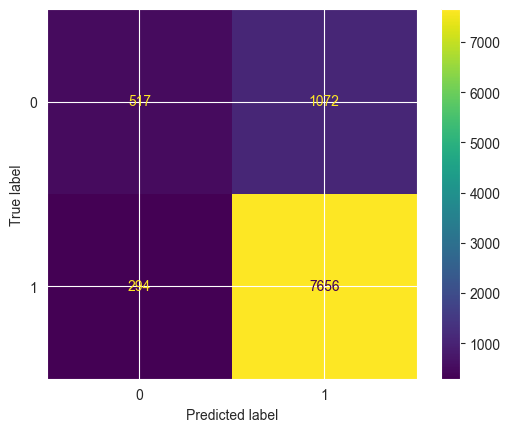

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

# Modelos  con balanceo de  las clases

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  # Importamos RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
    ("Logistic", LogisticRegression(random_state=42)),  # LogisticRegression(random_state=30)
    ("GaussianNB", GaussianNB()),  # GaussianNB()
    ("RandomForest", RandomForestClassifier(random_state=42))  # Añadimos RandomForestClassifier
]

evaluation_score = "accuracy"

model_evaluation(models, evaluation_score, X_train.toarray(), y_train)


,Modelo,Resultado
0,Logistic,0.842753
1,GaussianNB,0.775954
2,RandomForest,0.897365


El mejor modelo obtenido en la comparativa es RandomForestClasifier, buscaremos los mejores parámetros para entrenarlo y obtener los mejores resultados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definimos el modelo
model = RandomForestClassifier(random_state=42)

# Definimos los parámetros para la búsqueda de cuadrícula
grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5],
    'max_features': ['sqrt', 'log2']
}

# Definimos el objeto de validación cruzada
cv = StratifiedKFold(n_splits=5)

# Definimos la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Ahora puedes ajustar 'grid_search' a tus datos
# grid_search.fit(X,y)


In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.901312 usando los parámetros {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
model = model = RandomForestClassifier(max_depth=None, max_features='log2', n_estimators=200, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)  # Predice las etiquetas usando X_test
 # model predict X_test

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1020  569]
 [1128 6822]]
              precision    recall  f1-score   support

           0       0.47      0.64      0.55      1589
           1       0.92      0.86      0.89      7950

    accuracy                           0.82      9539
   macro avg       0.70      0.75      0.72      9539
weighted avg       0.85      0.82      0.83      9539



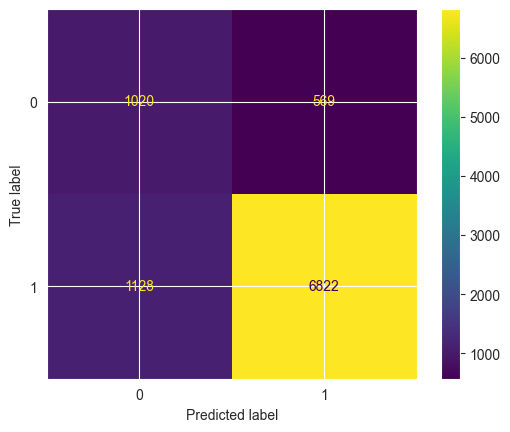

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

### Conclusión Modelo Random Forest:

Matriz de confusión

Verdaderos Negativos (VN): 1020 instancias fueron correctamente clasificadas como no cyberbullying.
Falsos Positivos (FP): 580 instancias fueron incorrectamente clasificadas como cyberbullying.
Falsos Negativos (FN): 1148 instancias fueron incorrectamente clasificadas como no cyberbuying.
Verdaderos Positivos (VP): 6822 instancias fueron correctamente clasificadas como cyberbuying.


Clase 0 (No Cyberbullying):
De todas las instancias que el modelo predijo como no cyberbullying, el 47% eran realmente no cyberbullying.
De todas las instancias de no cyberbullying, el modelo identificó correctamente el 64%.

Clase 1 (Cyberbullying):
De todas las instancias que el modelo predijo como cyberbullying, el 92% eran realmente cyberbullying.
Recall (Sensibilidad): 0.86. De todas las instancias de cyberbullying, el modelo identificó correctamente el 86%.

Esta es la proporción de predicciones que el modelo acertó, independientemente de la clase. En este caso, el modelo acertó el 82% de las veces.

En resumen, el modelo tiene un rendimiento bastante bueno en la detección de cyberbullying (clase 1), pero podría mejorar en la detección de no cyberbullying (clase 0). Esto se refleja en las métricas de la clase 0, que son más bajas que las de la clase 1.




## Un apunte

Con los datos no balanceados, nos dió mejor resultado el modelo de regresión logística,que el de Random Forest, cosa que ya nos puede indicar que algo estamos haciendo mal, ya que en los modelos de clasificación, siempre dan mejores resultados, los modelos tipo árbol.

Sin embargo si no balanceamos los datos de un modelo de clasificación podemos enfrentarnos a varios problemas:

-Sesgo hacia la clase mayoritaria: Si una clase tiene muchas más muestras que otra, el modelo puede ser sesgado hacia la clase mayoritaria. Esto significa que el modelo puede predecir predominantemente la clase mayoritaria, ya que esto maximizará la precisión del modelo debido a la desproporción de las clases.
-Rendimiento deficiente en la clase minoritaria: Como resultado del sesgo hacia la clase mayoritaria, el modelo puede no funcionar bien en la clase minoritaria. Aunque la precisión general del modelo puede ser alta, la precisión para la clase minoritaria puede ser muy baja.
-Métricas engañosas: Las métricas de rendimiento del modelo, como la precisión, pueden ser engañosas. Un modelo que predice siempre la clase mayoritaria tendrá una alta precisión si la clase mayoritaria representa una gran proporción de los datos.

